# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 9
## "Naiwny klasyfikator bayesowski"

In [9]:
# Import modułów
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Wczytanie pliku csv
df = pd.read_csv('data.csv', sep=',')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# Sprawdzanie kolumn z danymi tekstowymi
categorical = [df.columns[i] for i in range(len(df.columns)) if df.dtypes[i]=='object']
print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
# Uzupełnienie braków w kolumnach
df
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

#### <b> Dane są w znaczącej wiekszości kompletne i nie wymagają żadnych operacji .<b>

### <b> Model klasyfikujący ze względu na dochód. <b>

In [13]:
# Tworzenie zbiorów uczacych i testowych
X = df.iloc[:, 0:14]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


Wynik przewidziany przez model
[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']

Wynik rzeczywisty
[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']

Dokładność modelu wynosi: 79.74%

Confusion Matrix:
[[7041  366]
 [1613  749]]


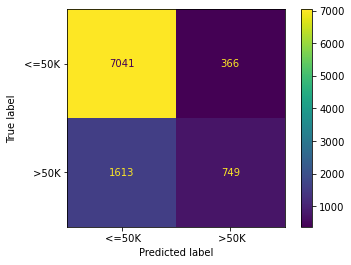

In [15]:
# Klasyfikacja danych ze zbiorów testowych i treningowych 
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

# Porównanie wyników
print("\nWynik przewidziany przez model")
print(y_pred)
print("\nWynik rzeczywisty")
print(np.array(y_test).reshape(1, -1)[0])

# Dokładność modelu
acc = GNB.score(X_test, y_test)
print("\nDokładność modelu wynosi: {a:.4}%\n".format(a = acc*100))

# Macierz błedu
c_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(c_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=GNB.classes_)
disp.plot()
plt.show()

#### <b> Model przypisywał obiekty do jednej z dwóch klas: '<=50K' (I) oraz '>50K' (II). Z macierzy błedu możemy wyczytać, iż 7041 elementów zostało poprawnie przypisanych do klasy I, 749 poprawnie do klasy II, 366 błędnie do klasy I, a 1613 błędnie do klasy II. <b>

### <b> Model klasyfikujący ze względu na rasę. <b>


Wynik przewidziany przez model
[' White' ' White' ' White' ... ' White' ' White' ' White']

Wynik rzeczywisty
[' White' ' White' ' White' ... ' Asian-Pac-Islander' ' White' ' White']

Dokładność modelu wynosi: 84.79%

Confusion Matrix:
[[   0    1    0    0   79]
 [   0    2    1    0  315]
 [   0    4   62    0  845]
 [   0    0    1    0   71]
 [   0   44  125    0 8219]]


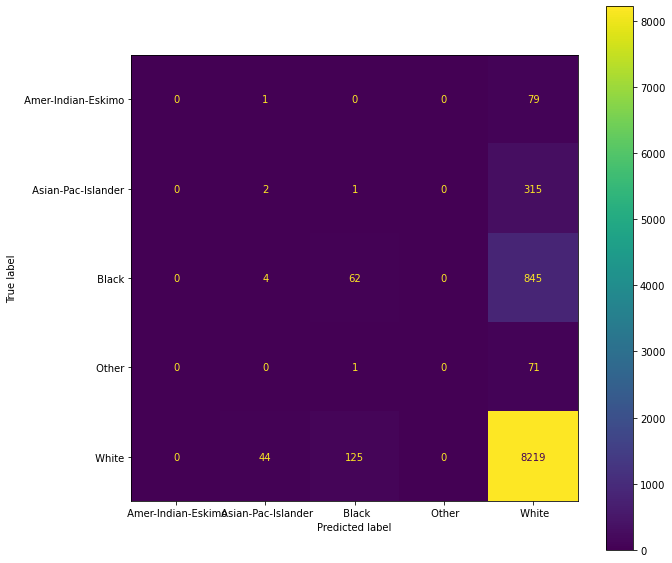

In [16]:
# Tworzenie zbiorów uczacych i testowych
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14,]]
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Klasyfikacja danych ze zbiorów testowych i treningowych 
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

# Porównanie wyników
print("\nWynik przewidziany przez model")
print(y_pred)
print("\nWynik rzeczywisty")
print(np.array(y_test))

# Dokładność modelu
c_matrix = confusion_matrix(y_test, y_pred)
acc = (np.trace(c_matrix))/(c_matrix.sum().sum()) * 100
print("\nDokładność modelu wynosi: {a:.4}%\n".format(a = acc))

# Macierz błedu
print("Confusion Matrix:")
print(c_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GNB, X_test, y_test, ax=ax)
plt.show()

#### <b> Model przypisywał do obiektu jedną z 5 ras. Na przekątnej macierzy znajdują się poprawnie przypisane rasy, natomiast w poszczególnych kolumnach (poza przekątną) rasa z wiersza błędnie zinterpretowana jako rasa z kolumny, np. w wierszu 2, kolumnie 5 są osoby czarne błędnie sklasyfikowane jako osoby białe. <b>

### <b> Model klasyfikujący ze względu na kraj pochodzenia. <b>


Wynik przewidziany przez model
[' Hong' ' Hong' ' Hong' ... ' United-States' ' Hong' ' Hong']

Wynik rzeczywisty
[' United-States' ' United-States' ' United-States' ... ' ?'
 ' United-States' ' United-States']

Dokładność modelu wynosi: 5.64%

Confusion Matrix:
[[   0    0    0 ...   11    0   26]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    1    0    4]
 ...
 [   0    0    0 ...  541    0 1188]
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    1    0    1]]


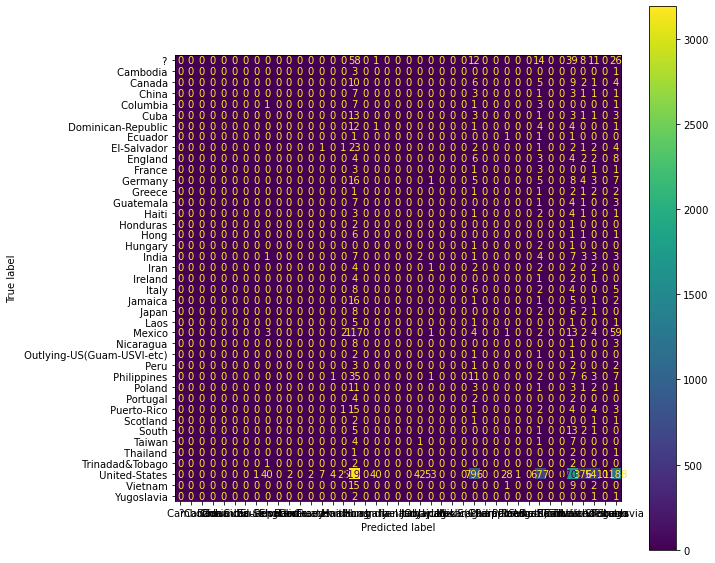

In [17]:
# Tworzenie zbiorów uczacych i testowych
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,]]
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Klasyfikacja danych ze zbiorów testowych i treningowych 
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

# Porównanie wyników
print("\nWynik przewidziany przez model")
print(y_pred)
print("\nWynik rzeczywisty")
print(np.array(y_test))

# Dokładność modelu
c_matrix = confusion_matrix(y_test, y_pred)
acc = (np.trace(c_matrix))/(c_matrix.sum().sum()) * 100
print("\nDokładność modelu wynosi: {a:.4}%\n".format(a = acc))

# Macierz błedu
print("Confusion Matrix:")
print(c_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GNB, X_test, y_test, ax=ax)
plt.show()

#### <b> Wyniki są cięznie do interpretacji. Dokładność modelu jest bardzo niewielka, zaledwie 5.64%, można to również odczytać z macierzy błędów (jej analiza jest tożsama z poprzednimi przykładami). Można wysnuć wniosek, że to podejście nie radzi sobie z klasyfikacja obiektów kiedy jest wiele klas, w tym przypadku było ich 40. <b>